#  Part 2: Data Visualization
In this section, I visualize the data from the master DataFrame, to better understand the numbers and extract useful information.

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [4]:
master = pd.read_csv('E:\Data_Science_Coursework\Rental Data Analysis\master.csv')
master.drop(columns = 'Unnamed: 0', inplace = True)
master.head()

,Name,Content,Visit,Source,Date,Time,Weekday
0,Artavia Price,I understand. Thanks anyway July would be the...,False,Facebook,2020-05-12,07:02:42.802000,1.0
1,Ashley Johnson,Yes. Please contact 832-985-4791 Is this stil...,False,Facebook,2020-05-18,09:53:18.357000,0.0
2,Ashley Ann Caldwell,7153935574 is me just in case Sounds good Tom...,True,Facebook,2020-05-10,15:15:27.126000,6.0
3,Ashley Renee,Thank you That's crazy but i get it But if yo...,False,Facebook,2020-05-17,16:47:17.766000,6.0
4,Eden Ciarra,Only a year. Iâm moving from out of state f...,False,Facebook,2020-05-17,10:07:41.969000,6.0


In [5]:
master.shape

(66, 7)

I have a total of 66 activities relating to the apartment advertisement. 

In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


## Section 1: Outcomes Analysis with Different Sources
1. Number of inquiries from each advertising platform.

In [7]:
# Count the number of inquiries from each source. 
master_sources = master.groupby('Source', axis=0).count()
master_sources.drop(index = ['Craigslist_Update','Facebook_Creation','Facebook_Update'], inplace = True)
master_sources.head()

,Name,Content,Visit,Date,Time,Weekday
Source,,,,,,
Craigslist,15,9,15,15,15,15
Facebook,26,24,26,26,26,26
Nextdoor,5,5,5,5,2,5
sublet.com,6,5,6,6,1,6


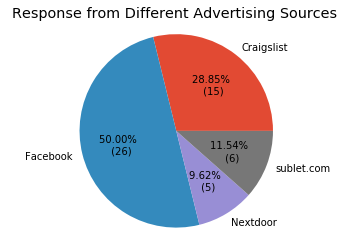

In [8]:
# Make a pie chart. 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n ({v:d})'.format(p=pct,v=val)
    return my_autopct

master_sources['Name'].plot(kind='pie', 
                            autopct = make_autopct(master_sources['Name']),
                            fontsize = 10)
plt.title('Response from Different Advertising Sources')
plt.axis('equal')
plt.ylabel('')
#texts[0].set_fontsize(4)
plt.show()

2. Percentage of interested people Visiting the apartment.

In [9]:
master_visit = master.groupby('Visit', axis=0).count()
master_visit.drop(index = ['Craigslist_Update','Facebook_Creation','Facebook_Update'], inplace = True)
master_visit.head()

,Name,Content,Source,Date,Time,Weekday
Visit,,,,,,
False,51,45,51,51,43,51
True,9,6,9,9,9,9


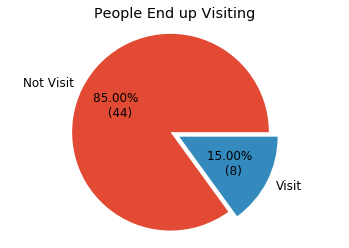

In [10]:
master_visit['Name'].plot(kind='pie', 
                            autopct = make_autopct(master_sources['Name']),
                           textprops={'fontsize': 12},
                         explode = [0.1, 0],
                         labels = ['Not Visit','Visit'])
plt.title('People End up Visiting')
plt.axis('equal')
plt.ylabel('')
plt.show()

Around 15% of people interested in the apartment ended up visiting. 
3. The visiting rate from each source.

In [11]:
master_sourcesvisit = master.groupby(['Source', 'Visit'], axis=0).count()
master_sourcesvisit.drop(index = 'Craigslist_Update', axis = 0, inplace = True)
master_sourcesvisit.head()

Name  Content  Date  Time  Weekday
Source     Visit                                    
Craigslist False    13        7    13    13       13
           True      2        2     2     2        2
Facebook   False    20       20    20    20       20
           True      6        4     6     6        6
Nextdoor   False     5        5     5     2        5

In [12]:
master_sourcesvisit.index

MultiIndex([('Craigslist', False),
            ('Craigslist',  True),
            (  'Facebook', False),
            (  'Facebook',  True),
            (  'Nextdoor', False),
            ('sublet.com', False),
            ('sublet.com',  True)],
           names=['Source', 'Visit'])

In [13]:
master_sourcesvisit.loc[('Craigslist', False), 'Name']

13

In [14]:
master_sourcesvisit_perc = pd.DataFrame()
master_sourcesvisit_perc.head()
for source, visit in master_sourcesvisit.index:
    if visit == True:
        print(source)
        print(master_sourcesvisit.loc[(source, True),'Name'] / master_sourcesvisit.loc[(source, False),'Name'])
        percentage = master_sourcesvisit.loc[(source, True),'Name'] / master_sourcesvisit.loc[(source, False),'Name']*100
        master_sourcesvisit_perc = master_sourcesvisit_perc.append(pd.Series([source, percentage]), ignore_index=True)
    
master_sourcesvisit_perc.head()

Craigslist
0.15384615384615385
Facebook
0.3
sublet.com
0.2


,0,1
0,Craigslist,15.384615
1,Facebook,30.000000
2,sublet.com,20.000000


In [15]:
master_sourcesvisit_perc.rename(columns = {0: 'Source', 1: 'Percentage'}, inplace = True)
master_sourcesvisit_perc.set_index('Source', inplace = True)
master_sourcesvisit_perc.sort_values(['Percentage'], ascending = False, inplace = True)
master_sourcesvisit_perc.head()

,Percentage
Source,
Facebook,30.000000
sublet.com,20.000000
Craigslist,15.384615


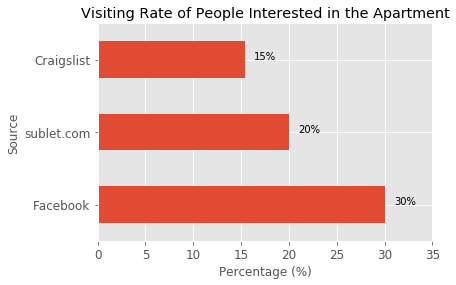

In [16]:
master_sourcesvisit_perc.plot(kind = 'barh', legend = None, 
                              label = True,
                              title = 'Visiting Rate of People Interested in the Apartment', 
                              fontsize = 12,
                              xlim = [0, 35]
                              )
plt.xlabel('Percentage (%)')
for i, v in  enumerate(master_sourcesvisit_perc.Percentage):
    plt.text(v +1, i, "{:.0f}%".format(v), color = 'k')

Looks like interested people from Facebook is most likely to end up visiting the apartment. 

## Section 2: Inquiries with Time

In [17]:
master_onehot = pd.get_dummies(master['Source'])
master_onehot.head()

,Craigslist,Craigslist_Update,Facebook,Facebook_Creation,Facebook_Update,Nextdoor,sublet.com
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [18]:
master_onehot = pd.concat([master_onehot, master], axis = 1)

master_onehot.head()

,Craigslist,Craigslist_Update,Facebook,Facebook_Creation,Facebook_Update,Nextdoor,sublet.com,Name,Content,Visit,Source,Date,Time,Weekday
0,0,0,1,0,0,0,0,Artavia Price,I understand. Thanks anyway July would be the...,False,Facebook,2020-05-12,07:02:42.802000,1.0
1,0,0,1,0,0,0,0,Ashley Johnson,Yes. Please contact 832-985-4791 Is this stil...,False,Facebook,2020-05-18,09:53:18.357000,0.0
2,0,0,1,0,0,0,0,Ashley Ann Caldwell,7153935574 is me just in case Sounds good Tom...,True,Facebook,2020-05-10,15:15:27.126000,6.0
3,0,0,1,0,0,0,0,Ashley Renee,Thank you That's crazy but i get it But if yo...,False,Facebook,2020-05-17,16:47:17.766000,6.0
4,0,0,1,0,0,0,0,Eden Ciarra,Only a year. Iâm moving from out of state f...,False,Facebook,2020-05-17,10:07:41.969000,6.0


In [19]:
master_onehot.Date= [datetime.strptime(str(x)[0:10], '%Y-%m-%d') for x in master_onehot.Date]
master_date = master_onehot.groupby('Date').sum()
master_date.drop('Weekday', axis = 1, inplace = True)

master_date.head()

,Craigslist,Craigslist_Update,Facebook,Facebook_Creation,Facebook_Update,Nextdoor,sublet.com
Date,,,,,,,
2020-01-26,0,1,0,0,0,0,0
2020-03-17,0,0,0,0,0,0,1
2020-03-24,0,1,0,0,0,0,0
2020-04-04,0,3,0,0,0,0,0
2020-04-11,0,1,0,0,0,0,0


In [20]:
updates = []

for i in range(len(master_date.index)):
    if master_date.iloc[i]['Facebook_Creation'] != 0 or master_date.iloc[i]['Facebook_Update'] != 0 or \
    master_date.iloc[i]['Craigslist_Update'] != 0:
        if master_date.iloc[i]['Facebook_Creation'] != 0:
            text = 'Facebook_Creation \n'
        else:
            text = ''
        if master_date.iloc[i]['Facebook_Update'] != 0:
            text = text + 'Facebook_Update \n'
        if master_date.iloc[i]['Craigslist_Update'] != 0:
            text = text + 'Craigslist_Update'

        updates.append((master_date.index[i], text, master_date.iloc[i]['Facebook'] + master_date.iloc[i]['Craigslist']+ \
                        master_date.iloc[i]['Nextdoor'] + master_date.iloc[i]['sublet.com']))

updates


[(Timestamp('2020-01-26 00:00:00'), 'Craigslist_Update', 0),
 (Timestamp('2020-03-24 00:00:00'), 'Craigslist_Update', 0),
 (Timestamp('2020-04-04 00:00:00'), 'Craigslist_Update', 0),
 (Timestamp('2020-04-11 00:00:00'), 'Craigslist_Update', 0),
 (Timestamp('2020-04-18 00:00:00'), 'Facebook_Creation \n', 1),
 (Timestamp('2020-05-09 00:00:00'),
  'Facebook_Creation \nFacebook_Update \nCraigslist_Update',
  2),
 (Timestamp('2020-05-16 00:00:00'), 'Facebook_Creation \n', 4)]

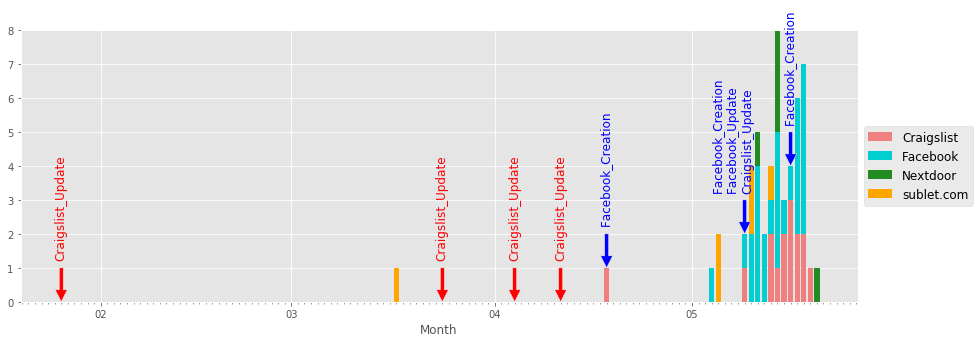

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(pd.to_datetime(master_date.index),
       master_date.Craigslist,
       label = True,
       color = 'lightcoral'
       )

ax.bar(pd.to_datetime(master_date.index),
       master_date.Facebook,
       bottom = master_date.Craigslist,
       color = 'darkturquoise'
        )

ax.bar(pd.to_datetime(master_date.index),
       master_date.Nextdoor,
       bottom = master_date.Facebook + master_date.Craigslist,
       color = 'forestgreen'
        )

ax.bar(pd.to_datetime(master_date.index),
       master_date['sublet.com'],
       bottom = master_date.Nextdoor + master_date.Facebook + master_date.Craigslist,
       color = 'orange'
        )

for date, label, position in updates:
    if position == 2:
        ax.annotate('', xy = (date, position),
                xytext = (date, position +1),
                arrowprops = dict(facecolor = 'b'),
                horizontalalignment = 'center'
               )
        ax.text(date-timedelta(days=5), position + 1.3, label, rotation = 90, size = 12, color = 'b')
    else:
        if 'Facebook' in label:
            ax.annotate('', xy = (date, position),
                    xytext = (date, position +1),
                    arrowprops = dict(facecolor = 'b'),
                    horizontalalignment = 'center'
                   )
            ax.text(date-timedelta(days=1), position + 1.3, label, rotation = 90, size = 12, color = 'b')
        else:
            ax.annotate('', xy = (date, position),
                    xytext = (date, position + 1),
                    arrowprops = dict(facecolor = 'r'),
                    horizontalalignment = 'center'
                   )
            ax.text(date-timedelta(days=1), position + 1.3, label, rotation = 90, size = 12, color = 'r')


#ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04,0.5), loc="center left")
ax.legend(('Craigslist', 'Facebook','Nextdoor','sublet.com'), bbox_to_anchor=(1,0.5), loc="center left", fontsize = 12)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%m')
ax.xaxis_date()

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)

ax.set_xlabel('Month')

plt.show()

Now I want to know which weekday is mostly likely to get inquires. 

In [22]:
master_onehot.head()

,Craigslist,Craigslist_Update,Facebook,Facebook_Creation,Facebook_Update,Nextdoor,sublet.com,Name,Content,Visit,Source,Date,Time,Weekday
0,0,0,1,0,0,0,0,Artavia Price,I understand. Thanks anyway July would be the...,False,Facebook,2020-05-12,07:02:42.802000,1.0
1,0,0,1,0,0,0,0,Ashley Johnson,Yes. Please contact 832-985-4791 Is this stil...,False,Facebook,2020-05-18,09:53:18.357000,0.0
2,0,0,1,0,0,0,0,Ashley Ann Caldwell,7153935574 is me just in case Sounds good Tom...,True,Facebook,2020-05-10,15:15:27.126000,6.0
3,0,0,1,0,0,0,0,Ashley Renee,Thank you That's crazy but i get it But if yo...,False,Facebook,2020-05-17,16:47:17.766000,6.0
4,0,0,1,0,0,0,0,Eden Ciarra,Only a year. Iâm moving from out of state f...,False,Facebook,2020-05-17,10:07:41.969000,6.0


In [23]:
master_weekday = master_onehot.groupby('Weekday').sum()
master_weekday.head()

,Craigslist,Craigslist_Update,Facebook,Facebook_Creation,Facebook_Update,Nextdoor,sublet.com
Weekday,,,,,,,
0.0,2,0,10,0,0,1,0
1.0,1,1,2,0,0,0,3
2.0,2,0,1,0,0,1,1
3.0,1,0,4,0,0,3,0
4.0,2,0,1,0,0,0,0


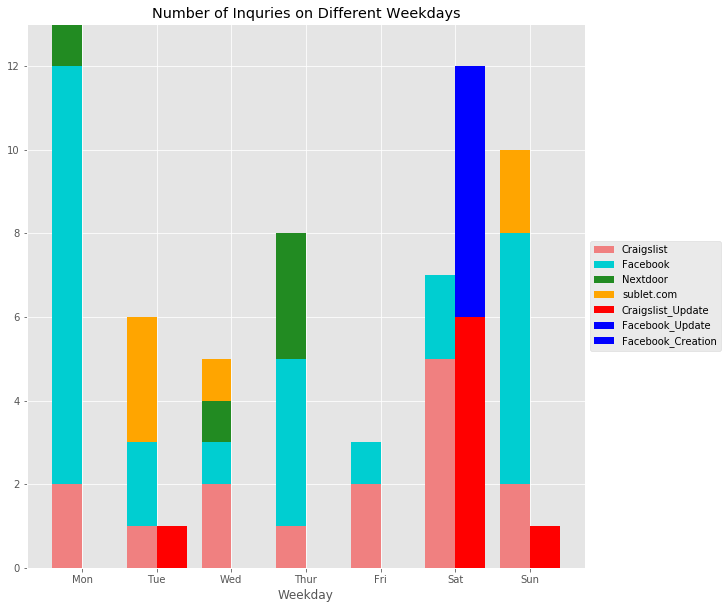

In [24]:
fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(1,1,1)

ax1.bar(master_weekday.index-0.2,
       master_weekday.Craigslist,
       label = 'Craigslist',
        width = 0.4,
       color = 'lightcoral'
       )

ax1.bar(master_weekday.index-0.2,
       master_weekday.Facebook,
       bottom = master_weekday.Craigslist,
        label = 'Facebook',
        width = 0.4,
       color = 'darkturquoise'
        )

ax1.bar(master_weekday.index-0.2,
       master_weekday.Nextdoor,
       bottom = master_weekday.Facebook + master_weekday.Craigslist,
        width = 0.4,
        label = 'Nextdoor',
       color = 'forestgreen'
        )

ax1.bar(master_weekday.index-0.2,
       master_weekday['sublet.com'],
       bottom = master_weekday.Nextdoor + master_weekday.Facebook + master_weekday.Craigslist,
        width = 0.4,
        label = 'sublet.com',
       color = 'orange'
        )

ax1.bar(master_weekday.index+0.2,
       master_weekday.Craigslist_Update,
        width = 0.4,
        label = 'Craigslist_Update',
       color = 'r'
        )

ax1.bar(master_weekday.index+0.2,
       master_weekday['Facebook_Update'],
       bottom = master_weekday.Craigslist_Update,
        width = 0.4,
        label = 'Facebook_Update',
       color = 'b'
        )

ax1.bar(master_weekday.index+0.2,
       master_weekday['Facebook_Creation'],
       bottom = master_weekday.Craigslist_Update + master_weekday.Facebook_Update,
        width = 0.4,
        label = 'Facebook_Creation',
       color = 'b'
        )

ax1.set_xticklabels(['','Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
ax1.set_title('Number of Inquries on Different Weekdays')
ax1.set_xlabel('Weekday')
ax1.legend(bbox_to_anchor=(1,0.5), loc="center left")

I also want to know what time of the day people are most likely to contact me. 

First, extract time for each inquiry for each source and put the time in lists. 

In [25]:
facebook_lst = []
craigslist_lst = []
nextdoor_lst = []
sublet_lst = []
for i in range(len(master.Time)):
    if str(master.iloc[i]['Time']) != 'nan':
        source = master.iloc[i]['Source']
        time = datetime.strptime(master.iloc[i]['Time'][:8], '%H:%M:%S')
        if source == 'Facebook':
            facebook_lst.append(time)
        elif source == 'Craigslist':
            craigslist_lst.append(time)
        elif source == 'Nextdoor':
            nextdoor_lst.append(time)
        elif source == 'sublet.com':
            sublet_lst.append(time)
    

print (facebook_lst,
craigslist_lst,
nextdoor_lst,
sublet_lst)

[datetime.datetime(1900, 1, 1, 7, 2, 42), datetime.datetime(1900, 1, 1, 9, 53, 18), datetime.datetime(1900, 1, 1, 15, 15, 27), datetime.datetime(1900, 1, 1, 16, 47, 17), datetime.datetime(1900, 1, 1, 10, 7, 41), datetime.datetime(1900, 1, 1, 1, 11, 30), datetime.datetime(1900, 1, 1, 8, 26, 56), datetime.datetime(1900, 1, 1, 17, 5, 25), datetime.datetime(1900, 1, 1, 20, 6, 20), datetime.datetime(1900, 1, 1, 15, 50, 42), datetime.datetime(1900, 1, 1, 6, 6, 41), datetime.datetime(1900, 1, 1, 19, 12, 9), datetime.datetime(1900, 1, 1, 7, 35, 13), datetime.datetime(1900, 1, 1, 11, 55, 19), datetime.datetime(1900, 1, 1, 2, 23, 49), datetime.datetime(1900, 1, 1, 7, 25, 46), datetime.datetime(1900, 1, 1, 13, 12, 3), datetime.datetime(1900, 1, 1, 4, 58, 58), datetime.datetime(1900, 1, 1, 21, 55, 54), datetime.datetime(1900, 1, 1, 23, 10, 37), datetime.datetime(1900, 1, 1, 22, 54, 36), datetime.datetime(1900, 1, 1, 20, 26, 52), datetime.datetime(1900, 1, 1, 2, 35, 25), datetime.datetime(1900, 1, 

In [26]:
np.datetime64(facebook_lst[0])

numpy.datetime64('1900-01-01T07:02:42.000000')

In [27]:
facebook_lst.sort()
facebook_lst

[datetime.datetime(1900, 1, 1, 1, 11, 30),
 datetime.datetime(1900, 1, 1, 2, 23, 49),
 datetime.datetime(1900, 1, 1, 2, 35, 25),
 datetime.datetime(1900, 1, 1, 4, 58, 58),
 datetime.datetime(1900, 1, 1, 6, 6, 41),
 datetime.datetime(1900, 1, 1, 7, 2, 42),
 datetime.datetime(1900, 1, 1, 7, 25, 46),
 datetime.datetime(1900, 1, 1, 7, 35, 13),
 datetime.datetime(1900, 1, 1, 8, 26, 56),
 datetime.datetime(1900, 1, 1, 9, 2),
 datetime.datetime(1900, 1, 1, 9, 53, 18),
 datetime.datetime(1900, 1, 1, 10, 7, 41),
 datetime.datetime(1900, 1, 1, 10, 37),
 datetime.datetime(1900, 1, 1, 11, 55, 19),
 datetime.datetime(1900, 1, 1, 13, 12, 3),
 datetime.datetime(1900, 1, 1, 13, 50, 45),
 datetime.datetime(1900, 1, 1, 15, 15, 27),
 datetime.datetime(1900, 1, 1, 15, 50, 42),
 datetime.datetime(1900, 1, 1, 16, 47, 17),
 datetime.datetime(1900, 1, 1, 17, 5, 25),
 datetime.datetime(1900, 1, 1, 19, 12, 9),
 datetime.datetime(1900, 1, 1, 20, 6, 20),
 datetime.datetime(1900, 1, 1, 20, 26, 52),
 datetime.datet

Text(0, 0.5, '# of inquiries')

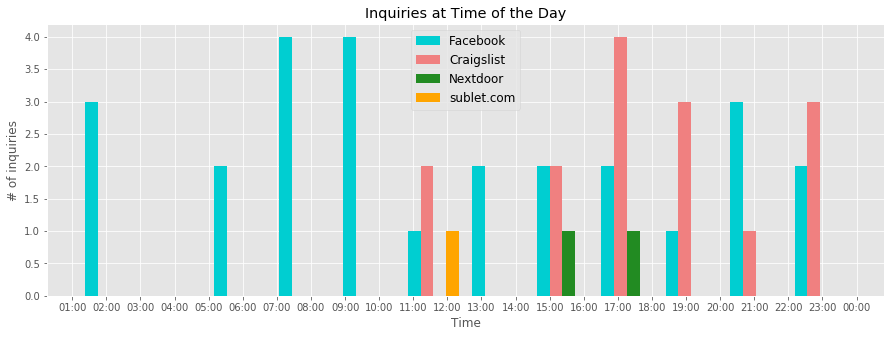

In [28]:
fig3, ax2 = plt.subplots(figsize=(15,5))
ax2.hist([facebook_lst, craigslist_lst, nextdoor_lst, sublet_lst], 
         12, 
    #     alpha = 0.5, 
         histtype='bar',
         color = ['darkturquoise','lightcoral','forestgreen','orange'] )

hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_locator(hours)
ax2.xaxis.set_major_formatter(h_fmt)
#ax2.set_xticklabels()
ax2.set_title('Inquiries at Time of the Day')
ax2.legend(['Facebook', 'Craigslist','Nextdoor','sublet.com'], prop = {'size': 12})
ax2.set_xlabel('Time')
ax2.set_ylabel('# of inquiries')

## Section 3: People Interest  through Keywords in Communication
Now I want to divide people into 2 groups: 
* those ending up visiting the apartment and 
* those who did not. 

Are their interest the same? We can take a look at the keywords in their messages by generating a word cloud.

In [29]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [30]:
stopwords = set(STOPWORDS)

In [31]:
yesstr=''
nostr=''
for i in range(len(master.Visit)):
    if master.iloc[i]['Visit'] == True:
        yesstr = yesstr + str(master.iloc[i]['Content'])
    elif master.iloc[i]['Visit'] == False:
        nostr = nostr + str(master.iloc[i]['Content'])
        

In [32]:
yeswordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(yesstr) 

Keywords from those who **ended with** visiting the apartment:

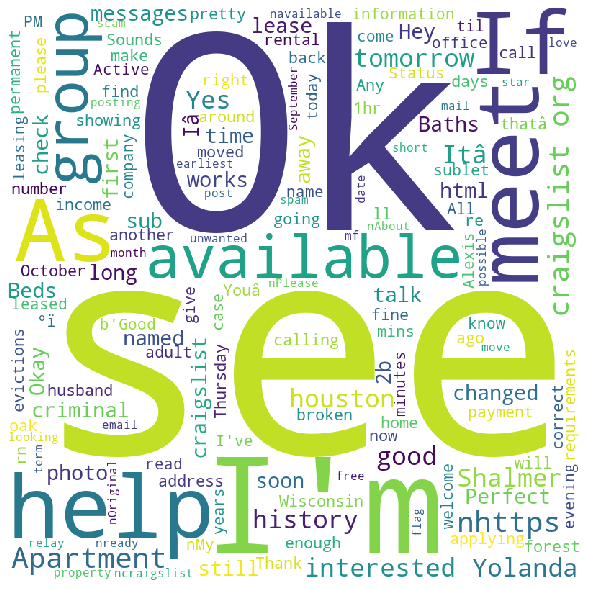

In [33]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(yeswordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Keywords from those who **did not end with** visiting the apartment:

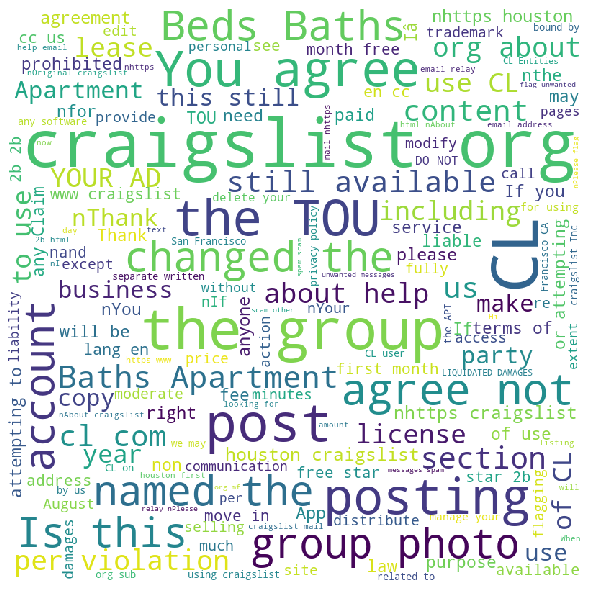

In [34]:
nowordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_text(nostr) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(nowordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 